In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')

test_data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

In [3]:
train_data.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

# Data Preprocessing

In [4]:
imputer = SimpleImputer(strategy='most_frequent')

train = imputer.fit_transform(train_data)
test = imputer.fit_transform(test_data)

In [5]:
train = pd.DataFrame(train, columns=train_data.columns)
test = pd.DataFrame(test, columns=test_data.columns)

y_train = train.pop('Made_Purchase')


In [6]:
train.shape

(14731, 21)

<AxesSubplot:>

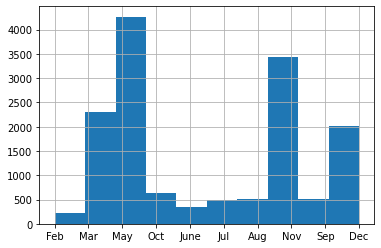

In [7]:
train['Month_SeasonalPurchase'].hist()

<AxesSubplot:>

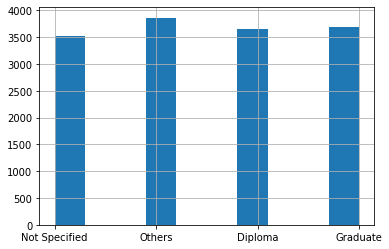

In [8]:
train['Education'].hist()

<AxesSubplot:>

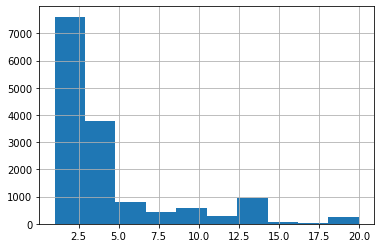

In [9]:
train['Type of Traffic'].hist()

<AxesSubplot:>

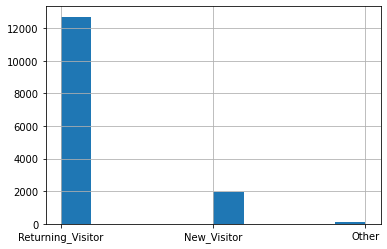

In [10]:
train['CustomerType'].hist()

<AxesSubplot:>

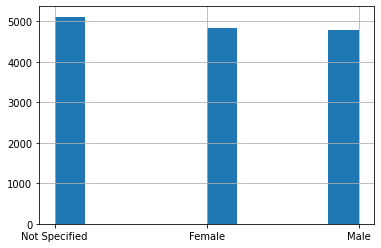

In [11]:
train['Gender'].hist()

<AxesSubplot:>

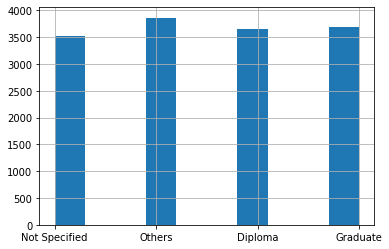

In [12]:
train['Education'].hist()

<AxesSubplot:>

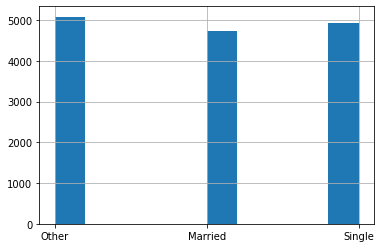

In [13]:
train['Marital Status'].hist()

In [14]:
num_train = [i for i in train.columns if train_data[i].dtype == float]
cat_train = [i for i in train.columns if train_data[i].dtype != float]

num_test = [i for i in test.columns if test_data[i].dtype == float]
cat_test = [i for i in test.columns if test_data[i].dtype != float]

In [15]:
ohe = OneHotEncoder(sparse=False)
minmax = MinMaxScaler()
ss = StandardScaler()

In [16]:
X1 = ss.fit_transform(train[num_train])
X2 = ohe.fit_transform(train[cat_train])
X2 = ss.fit_transform(X2)

X3 = ss.fit_transform(test[num_test])
X4 = ohe.fit_transform(test[cat_test])
X4 = ss.fit_transform(X4)

In [17]:
X_train = pd.concat([pd.DataFrame(X1, columns=num_train), 
               pd.DataFrame(X2, columns=ohe.get_feature_names_out())], 
              axis=1)

X_test = pd.concat([pd.DataFrame(X3, columns=num_test), 
               pd.DataFrame(X4, columns=ohe.get_feature_names_out())], 
              axis=1)

In [18]:
X_train

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,Cookies Setting_ALL,Cookies Setting_Deny,Cookies Setting_Required,Education_Diploma,Education_Graduate,Education_Not Specified,Education_Others,Marital Status_Married,Marital Status_Other,Marital Status_Single
0,-0.679181,-0.439417,-0.389509,-0.237571,-0.676525,-0.584894,3.551143,2.975017,-0.28361,-0.314568,...,-0.690501,1.372555,-0.702432,-0.574241,-0.578213,1.782977,-0.596089,-0.687716,1.377919,-0.708043
1,-0.679181,-0.439417,-0.389509,-0.237571,-0.654200,-0.583562,0.539548,1.815736,-0.28361,-0.314568,...,-0.690501,1.372555,-0.702432,-0.574241,-0.578213,-0.560860,1.677601,1.454090,-0.725732,-0.708043
2,-0.679181,-0.439417,-0.389509,-0.237571,-0.475605,-0.271447,-0.062771,0.076814,-0.28361,-0.314568,...,1.448223,-0.728568,-0.702432,-0.574241,-0.578213,-0.560860,1.677601,1.454090,-0.725732,-0.708043
3,-0.679181,-0.439417,-0.389509,-0.237571,-0.676525,-0.584894,3.551143,2.975017,-0.28361,1.669121,...,1.448223,-0.728568,-0.702432,1.741429,-0.578213,-0.560860,-0.596089,-0.687716,-0.725732,1.412344
4,-0.374187,-0.439417,-0.389509,-0.237571,-0.698849,-0.584894,3.551143,2.975017,-0.28361,-0.314568,...,-0.690501,1.372555,-0.702432,1.741429,-0.578213,-0.560860,-0.596089,-0.687716,1.377919,-0.708043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,-0.374187,-0.417024,-0.389509,-0.237571,0.171801,-0.093800,-0.155435,-0.549216,-0.28361,-0.314568,...,-0.690501,1.372555,-0.702432,-0.574241,-0.578213,-0.560860,1.677601,1.454090,-0.725732,-0.708043
14727,1.760769,0.215700,1.214589,0.170931,-0.453281,-0.458570,-0.464316,-0.675204,-0.28361,-0.314568,...,1.448223,-0.728568,-0.702432,1.741429,-0.578213,-0.560860,-0.596089,1.454090,-0.725732,-0.708043
14728,-0.069193,-0.016197,1.214589,4.440850,-0.475605,-0.013613,-0.464316,-0.438422,-0.28361,-0.314568,...,-0.690501,-0.728568,1.423626,-0.574241,-0.578213,-0.560860,1.677601,-0.687716,-0.725732,1.412344
14729,-0.679181,-0.439417,-0.389509,-0.237571,-0.564903,-0.056905,-0.464316,-0.245209,-0.28361,-0.314568,...,-0.690501,-0.728568,1.423626,-0.574241,-0.578213,1.782977,-0.596089,1.454090,-0.725732,-0.708043


In [19]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=23)

In [20]:
y_train_val_1 = []

for value in y_train_val:
  if value:
    y_train_val_1.append(1)
  else:
    y_train_val_1.append(-1)
    
y_val_1 = []

for value in y_val:
  if value:
    y_val_1.append(1)
  else:
    y_val_1.append(-1)

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression

In [22]:
log = LogisticRegression(solver='sag', random_state=64, tol=1e-3, max_iter=100)

log.fit(X_train_val, y_train_val_1)

y_log_pred = log.predict(X_val)

log.score(X_val,y_val_1)

0.6460807600950119

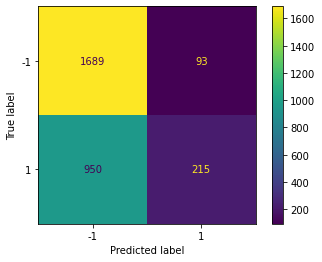

In [23]:
cm = confusion_matrix(y_val_1, y_log_pred,labels = log.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)

disp.plot()
plt.show()

# svm.SVC

In [24]:
svc = SVC(kernel='rbf',degree=3,gamma=0.01,random_state=23)

svc.fit(X_train_val, y_train_val_1)

svc.score(X_val,y_val_1)

0.6454021038344079

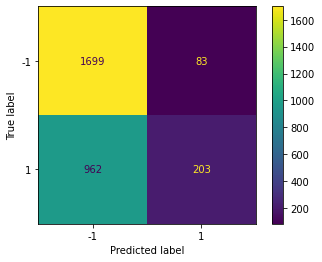

In [25]:
y_svc_pred = svc.predict(X_val)
cm = confusion_matrix(y_val_1, y_svc_pred,labels = svc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)

disp.plot()
plt.show()

# AdaBoost Classifier

In [26]:
cv = KFold(n_splits=10, random_state=23, shuffle=True)

'''score = cross_val_score(log, X_train_val, y_train_val_1, scoring='accuracy', cv=cv, n_jobs=-1)

print(score)'''

"score = cross_val_score(log, X_train_val, y_train_val_1, scoring='accuracy', cv=cv, n_jobs=-1)\n\nprint(score)"

In [27]:
ada = AdaBoostClassifier(random_state=64)

grid = RandomizedSearchCV(ada,
                    {'n_estimators': [5,10,20,40],
                     'learning_rate':[0.01,0.1,0.5,1]},
                    cv=cv)

grid.fit(X_train_val, y_train_val_1)
grid.best_params_

{'n_estimators': 20, 'learning_rate': 1}

In [28]:
bag = BaggingClassifier(grid, bootstrap=True, oob_score=True)

bag.fit(X_train_val, y_train_val_1)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(base_estimator=RandomizedSearchCV(cv=KFold(n_splits=10, random_state=23, shuffle=True),
                                                    estimator=AdaBoostClassifier(random_state=64),
                                                    param_distributions={'learning_rate': [0.01,
                                                                                           0.1,
                                                                                           0.5,
                                                                                           1],
                                                                         'n_estimators': [5,
                                                                                          10,
                                                                                          20,
                                                                                          40]}),
                  oob_score=True)

In [29]:
y_bag_pred = bag.predict(X_val)

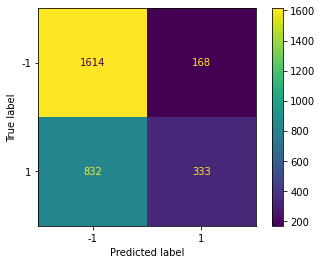

In [30]:
cm = confusion_matrix(y_val_1, y_bag_pred,labels = bag.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bag.classes_)

disp.plot()
plt.show()

In [31]:
'''ada = AdaBoostClassifier(log, learning_rate=0.1)

ada.fit(X_train_val, y_train_val_1)'''

'ada = AdaBoostClassifier(log, learning_rate=0.1)\n\nada.fit(X_train_val, y_train_val_1)'

In [32]:
y_pred = bag.predict(X_test)

In [33]:
bag.score(X_val, y_val_1)

0.660671869697998

In [34]:
y_final = []

for value in y_pred:
    if value == 1:
        y_final.append(True)
    else:
        y_final.append(False)

In [35]:
len(y_final)

6599

In [36]:
submission = pd.DataFrame({'Made_Purchase': y_final})
submission.to_csv('submission.csv', index = True, index_label = 'id')